In [125]:
import pandas as pd
import numpy as np
from statsmodels.tsa.seasonal import STL
from scipy.stats import mstats

In [27]:
df = pd.read_csv('../data/01_raw/shipments.csv')
df['time_var'] = pd.to_datetime(df['time_var'])

In [28]:
min_date = df['time_var'].min()
max_date = df['time_var'].max()

In [29]:
df

,prod_code,customer,location,category,time_var,shipments
0,8684_05,ALDI,sansebastian,snack,2022-09-26 00:00:00+00:00,0
1,8684_05,ALDI,sansebastian,snack,2022-12-26 00:00:00+00:00,0
2,8684_05,ALDI,sansebastian,snack,2023-04-03 00:00:00+00:00,0
3,8684_05,ALDI,sansebastian,snack,2021-04-12 00:00:00+00:00,0
4,8684_05,ALDI,sansebastian,snack,2021-11-22 00:00:00+00:00,0
...,...,...,...,...,...,...
5348,7196_04,aldi,Vitoria,beverage,2022-10-03 00:00:00+00:00,212741
5349,7196_04,aldi,Vitoria,beverage,2021-08-02 00:00:00+00:00,324769
5350,7196_04,aldi,Vitoria,beverage,2023-03-20 00:00:00+00:00,1334340
5351,7196_04,aldi,Vitoria,beverage,2020-11-16 00:00:00+00:00,75818


In [30]:
df = (df
      .sort_values('time_var')
      .set_index('time_var')
      .groupby(['prod_code', 'customer', 'location', 'category'])
      ['shipments']
      .apply(lambda x: 
             x.reindex(
                 pd.date_range(min_date, 
                               max_date, 
                               freq='W-MON'
                              ),
                 method='nearest'
             )
       )
      .reset_index()
      .rename(columns={'level_4': 'time_var'})
     )

In [31]:
dedf

,prod_code,customer,location,category,time_var,shipments
0,1424_01,lidl,bilbao,snack,2020-10-19 00:00:00+00:00,339919
1,1424_01,lidl,bilbao,snack,2020-10-26 00:00:00+00:00,432396
2,1424_01,lidl,bilbao,snack,2020-11-02 00:00:00+00:00,361797
3,1424_01,lidl,bilbao,snack,2020-11-09 00:00:00+00:00,369954
4,1424_01,lidl,bilbao,snack,2020-11-16 00:00:00+00:00,413049
...,...,...,...,...,...,...
5611,9876_02,bm,bilbao,juice,2023-09-11 00:00:00+00:00,272527
5612,9876_02,bm,bilbao,juice,2023-09-18 00:00:00+00:00,242351
5613,9876_02,bm,bilbao,juice,2023-09-25 00:00:00+00:00,312133
5614,9876_02,bm,bilbao,juice,2023-10-02 00:00:00+00:00,234807


In [88]:
df['n_zeros'] = (df
                 .groupby(['prod_code', 'customer', 'location'])
                 ['shipments']
                 .transform(lambda x: len(x[x==0]))
                )

In [90]:
df[df['n_zeros'] != 0]

,prod_code,customer,location,category,time_var,shipments,n_zeros
4836,8684_05,ALDI,sansebastian,snack,2020-10-19 00:00:00+00:00,158801,14
4837,8684_05,ALDI,sansebastian,snack,2020-10-26 00:00:00+00:00,184545,14
4838,8684_05,ALDI,sansebastian,snack,2020-11-02 00:00:00+00:00,405678,14
4839,8684_05,ALDI,sansebastian,snack,2020-11-09 00:00:00+00:00,247160,14
4840,8684_05,ALDI,sansebastian,snack,2020-11-16 00:00:00+00:00,234335,14
...,...,...,...,...,...,...,...
4987,8684_05,ALDI,sansebastian,snack,2023-09-11 00:00:00+00:00,662927,14
4988,8684_05,ALDI,sansebastian,snack,2023-09-18 00:00:00+00:00,619266,14
4989,8684_05,ALDI,sansebastian,snack,2023-09-25 00:00:00+00:00,529493,14
4990,8684_05,ALDI,sansebastian,snack,2023-10-02 00:00:00+00:00,498091,14


In [156]:
df

,prod_code,customer,location,category,time_var,shipments,n_zeros
0,1424_01,lidl,bilbao,snack,2020-10-19 00:00:00+00:00,339919,0
1,1424_01,lidl,bilbao,snack,2020-10-26 00:00:00+00:00,432396,0
2,1424_01,lidl,bilbao,snack,2020-11-02 00:00:00+00:00,361797,0
3,1424_01,lidl,bilbao,snack,2020-11-09 00:00:00+00:00,369954,0
4,1424_01,lidl,bilbao,snack,2020-11-16 00:00:00+00:00,413049,0
...,...,...,...,...,...,...,...
5611,9876_02,bm,bilbao,juice,2023-09-11 00:00:00+00:00,272527,0
5612,9876_02,bm,bilbao,juice,2023-09-18 00:00:00+00:00,242351,0
5613,9876_02,bm,bilbao,juice,2023-09-25 00:00:00+00:00,312133,0
5614,9876_02,bm,bilbao,juice,2023-10-02 00:00:00+00:00,234807,0


In [312]:
def _winsorize(df, threshold=0.05):

    stl = STL(df, period=52, seasonal=53)
    res = stl.fit()
    
    observed = res.observed.to_numpy()
    trend = res.trend
    seasonal = res.seasonal
    residual = res.resid

    residual_winsorize = mstats.winsorize(
                        residual, limits=[threshold, threshold]
                    )
    adjustment = (np.ma.getdata(residual_winsorize) - residual).round()
    residual_winsorize[adjustment != 0] = 0
    observed_winsorize = (trend + seasonal + residual_winsorize).round()

    # Change negative values to zero
    observed_winsorize = map(lambda x: max(x, 0), observed_winsorize)

    return observed_winsorize

In [313]:
df['new_ship'] = (df           
                     .sort_values(by='time_var')
                     .groupby(['prod_code', 'customer', 'location'])
                     ['shipments']
                     .transform(lambda x: _winsorize(x))
                    )

/home/pepsico/.local/lib/python3.10/site-packages/_plotly_utils/basevalidators.py:105: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result

/home/pepsico/.local/lib/python3.10/site-packages/_plotly_utils/basevalidators.py:105: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



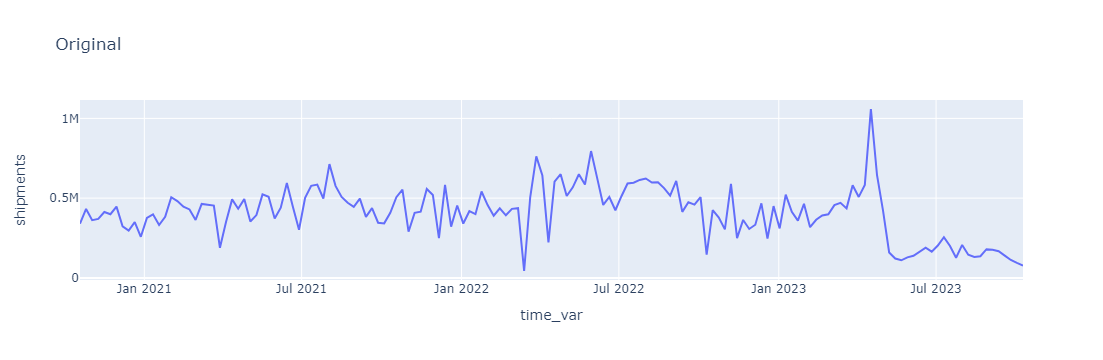

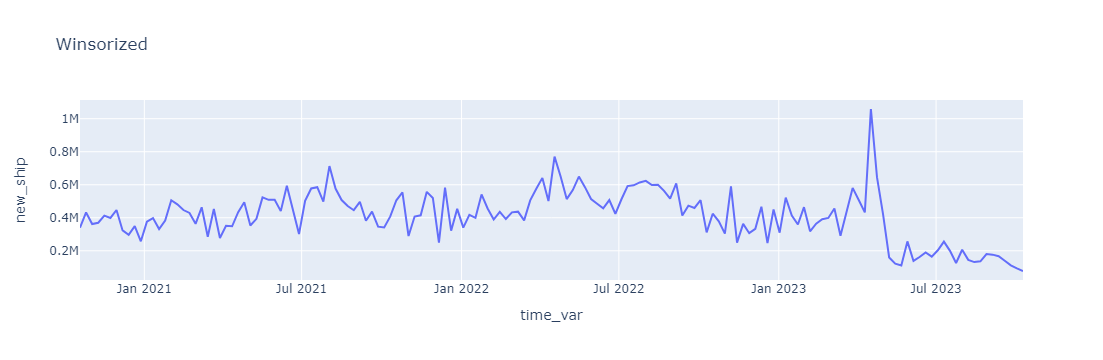

In [314]:
import plotly.express as px
pp = df[df['prod_code'] == '1424_01']
fig = px.line(pp, x="time_var", y="shipments", title='Original')
fig1 = px.line(pp, x="time_var", y="new_ship", title='Winsorized')
fig.show()
fig1.show()